In [1]:
import numpy as np
import pandas as pd
from numpy.linalg import inv
import math
import matplotlib.pyplot as plt

In [2]:
A_train = pd.read_csv("classificationA.train", sep  = "\t", names=["X1","X2","Y"])
B_train = pd.read_csv("classificationB.train", sep  = "\t", names=["X1","X2","Y"])
C_train = pd.read_csv("classificationC.train", sep  = "\t", names=["X1","X2","Y"])

A_test = pd.read_csv("classificationA.test", sep  = "\t", names=["X1","X2","Y"])
B_test = pd.read_csv("classificationB.test", sep  = "\t", names=["X1","X2","Y"])
C_test = pd.read_csv("classificationC.test", sep  = "\t", names=["X1","X2","Y"])

In [3]:
A_train['X3'] = 1
B_train['X3'] = 1
C_train['X3'] = 1

A_test['X3'] = 1
B_test['X3'] = 1
C_test['X3'] = 1

### Estimation des paramètres

In [4]:
def linear_regression(X,y):
    return inv(X.T.dot(X)).dot(X.T).dot(y)

In [5]:
w_A = pd.Series(linear_regression(A_train[['X1','X2','X3']],A_train.Y), index = ["X1", "X2", "X3"])
w_B = pd.Series(linear_regression(B_train[['X1','X2','X3']],B_train.Y), index = ["X1", "X2", "X3"])
w_C = pd.Series(linear_regression(C_train[['X1','X2','X3']],C_train.Y), index = ["X1", "X2", "X3"])

In [6]:
w_A

X1   -0.264008
X2   -0.372593
X3    0.492292
dtype: float64

In [7]:
w_B

X1   -0.104246
X2    0.051791
X3    0.500050
dtype: float64

In [8]:
w_C

X1   -0.127693
X2   -0.017001
X3    0.508400
dtype: float64

### Visualisation de la frontière

On a $w^T x = w_1 x_1 + w_2 x_2 + w_3 \underbrace{x_3}_{1} = \frac{1}{2} \Leftrightarrow x_2 = \frac{1}{w_2} (\frac{1}{2} - w_3 - w_1 x_1)$

In [9]:
def visualize(data, weights):
    color = ['red' if l else 'green' for l in data.Y]
    plt.scatter(data.X1, data.X2, color=color)

    x = np.linspace(data.X1.min(),data.X1.max(),1000)
    def f(t):
        return (1/weights.X2)*(0.5 - weights.X3 - weights.X1*t)
    plt.plot(x,f(x))
    plt.show()

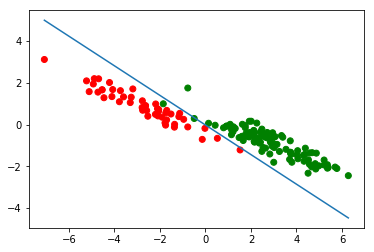

In [10]:
visualize(A_train,w_A)

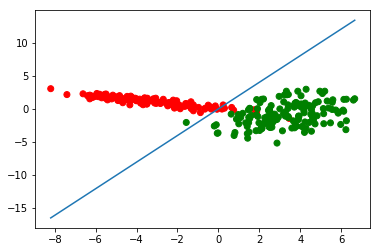

In [11]:
visualize(B_train,w_B)

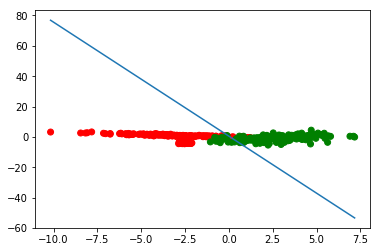

In [12]:
visualize(C_train,w_C)

### Erreur

Train

In [13]:
((A_train[["X1","X2","X3"]].dot(w_A) > 0.5) != A_train.Y).mean()

0.013333333333333334

In [14]:
((B_train[["X1","X2","X3"]].dot(w_B) > 0.5) != B_train.Y).mean()

0.029999999999999999

In [15]:
((C_train[["X1","X2","X3"]].dot(w_C) > 0.5) != C_train.Y).mean()

0.055

Test

In [16]:
((A_test[["X1","X2","X3"]].dot(w_A) > 0.5) != A_test.Y).mean()

0.020666666666666667

In [17]:
((B_test[["X1","X2","X3"]].dot(w_B) > 0.5) != B_test.Y).mean()

0.041500000000000002

In [18]:
((C_test[["X1","X2","X3"]].dot(w_C) > 0.5) != C_test.Y).mean()

0.042333333333333334